In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import mdtraj as md

In [2]:
sns.set_context('paper')
sns.set(font='Arial')
sns.set_style('ticks')

In [6]:
trajs = glob.glob('/Volumes/DATA/data/*/*.h5')

In [7]:
len(trajs)

6070

In [8]:
# remove broken runs (11707 only)

In [9]:
broken_runs = [1,7,8,10,16,22,24,25,26,27,28,30,31,32,33,34,35,39,40,41,60,61,62,63,64,65,66,67,68,69,75,76,77,78,79]

In [10]:
trajs_without_broken = []

for traj in trajs:
    if '11707' in traj:
        if int(traj.split('/')[5].split('-')[0][3:]) in broken_runs:
            continue
    trajs_without_broken.append(traj)       

In [11]:
len(trajs_without_broken)

5020

In [12]:
trajs = trajs_without_broken

In [13]:
lengths = []

for traj in trajs:
    lengths.append(len(md.open(traj)))

In [14]:
np.sum(lengths)

10115617

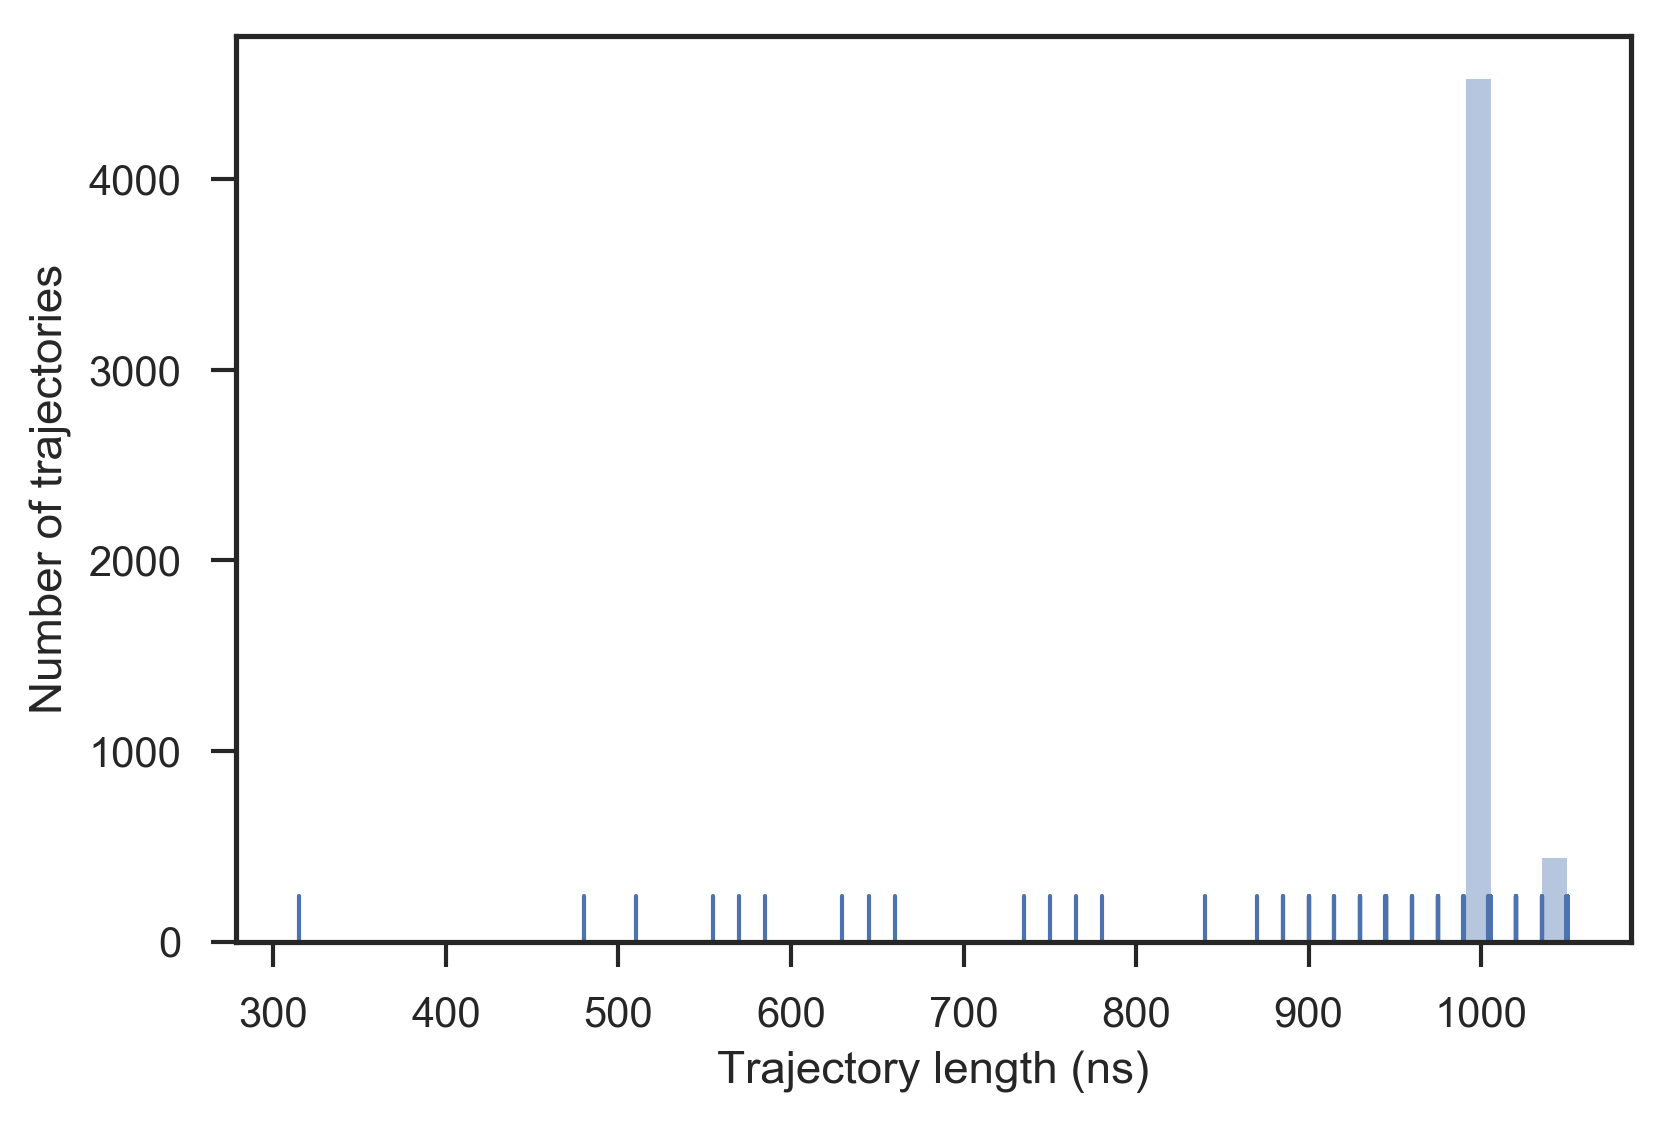

In [17]:
plt.figure(dpi=300)
sns.distplot(np.array(lengths)/2, kde=False, rug=True)
plt.ylabel('Number of trajectories')
plt.xlabel('Trajectory length (ns)')
plt.show()

In [43]:
# let's make two plots - one with only those smaller than 2000 frames

In [44]:
from collections import Counter

In [45]:
Counter(lengths)

Counter({630: 1,
         960: 1,
         1020: 1,
         1110: 1,
         1140: 1,
         1170: 1,
         1259: 1,
         1290: 1,
         1320: 1,
         1470: 1,
         1500: 1,
         1530: 1,
         1560: 1,
         1680: 1,
         1740: 1,
         1770: 2,
         1800: 4,
         1830: 2,
         1860: 4,
         1889: 1,
         1890: 6,
         1920: 3,
         1950: 5,
         1979: 1,
         1980: 1,
         2008: 1,
         2009: 15,
         2010: 4511,
         2040: 6,
         2070: 3,
         2099: 3,
         2100: 437})

In [16]:
lengths1 = []
lengths2 = []

for length in lengths:
    if length < 2000:
        lengths1.append(length)
    else:
        lengths2.append(length)

In [17]:
len(lengths1) / len(lengths) * 100

0.8764940239043826

In [18]:
len(lengths1)

44

In [19]:
len(lengths2)

4976

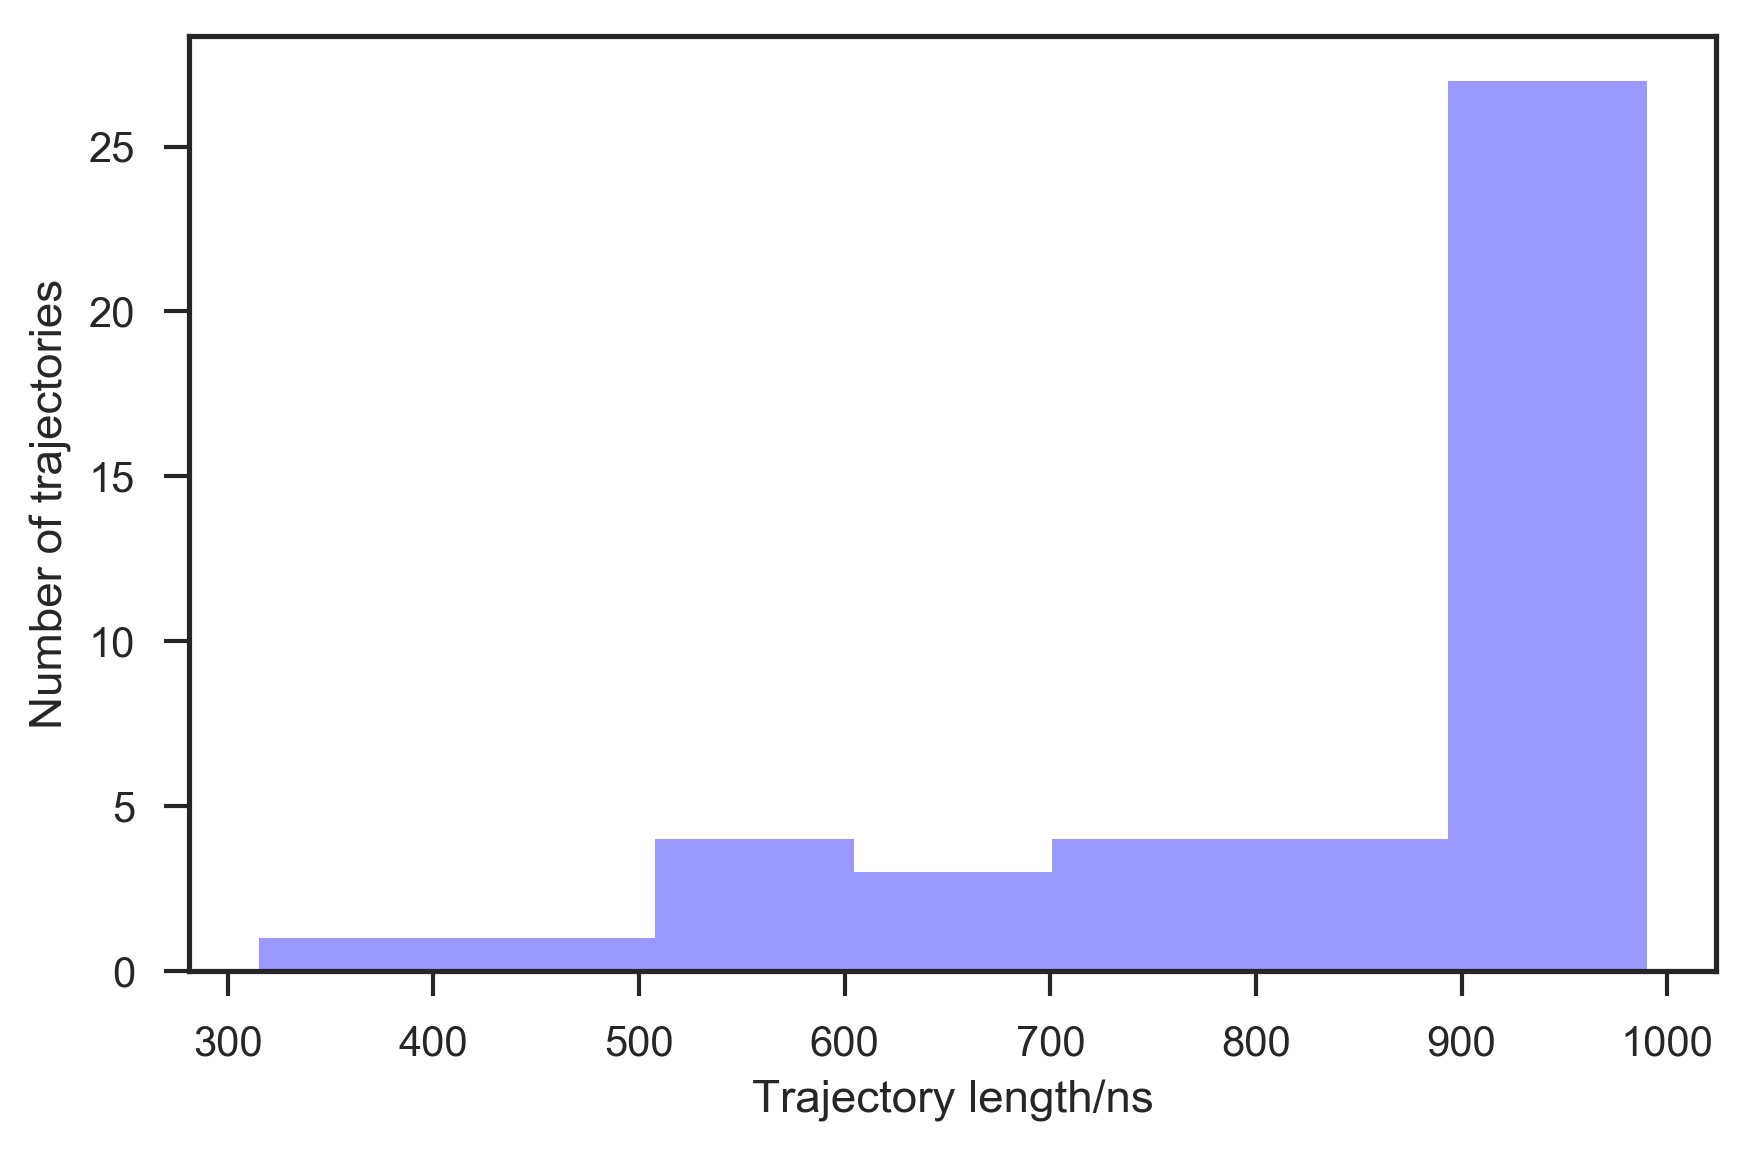

In [17]:
plt.figure(dpi=300)
sns.distplot(np.array(lengths1)/2, kde=False, color='blue')
plt.ylabel('Number of trajectories')
plt.xlabel('Trajectory length/ns')
plt.tight_layout()
plt.savefig('traj_length_histograms/lengths_under_1us_blue.pdf')
plt.show()

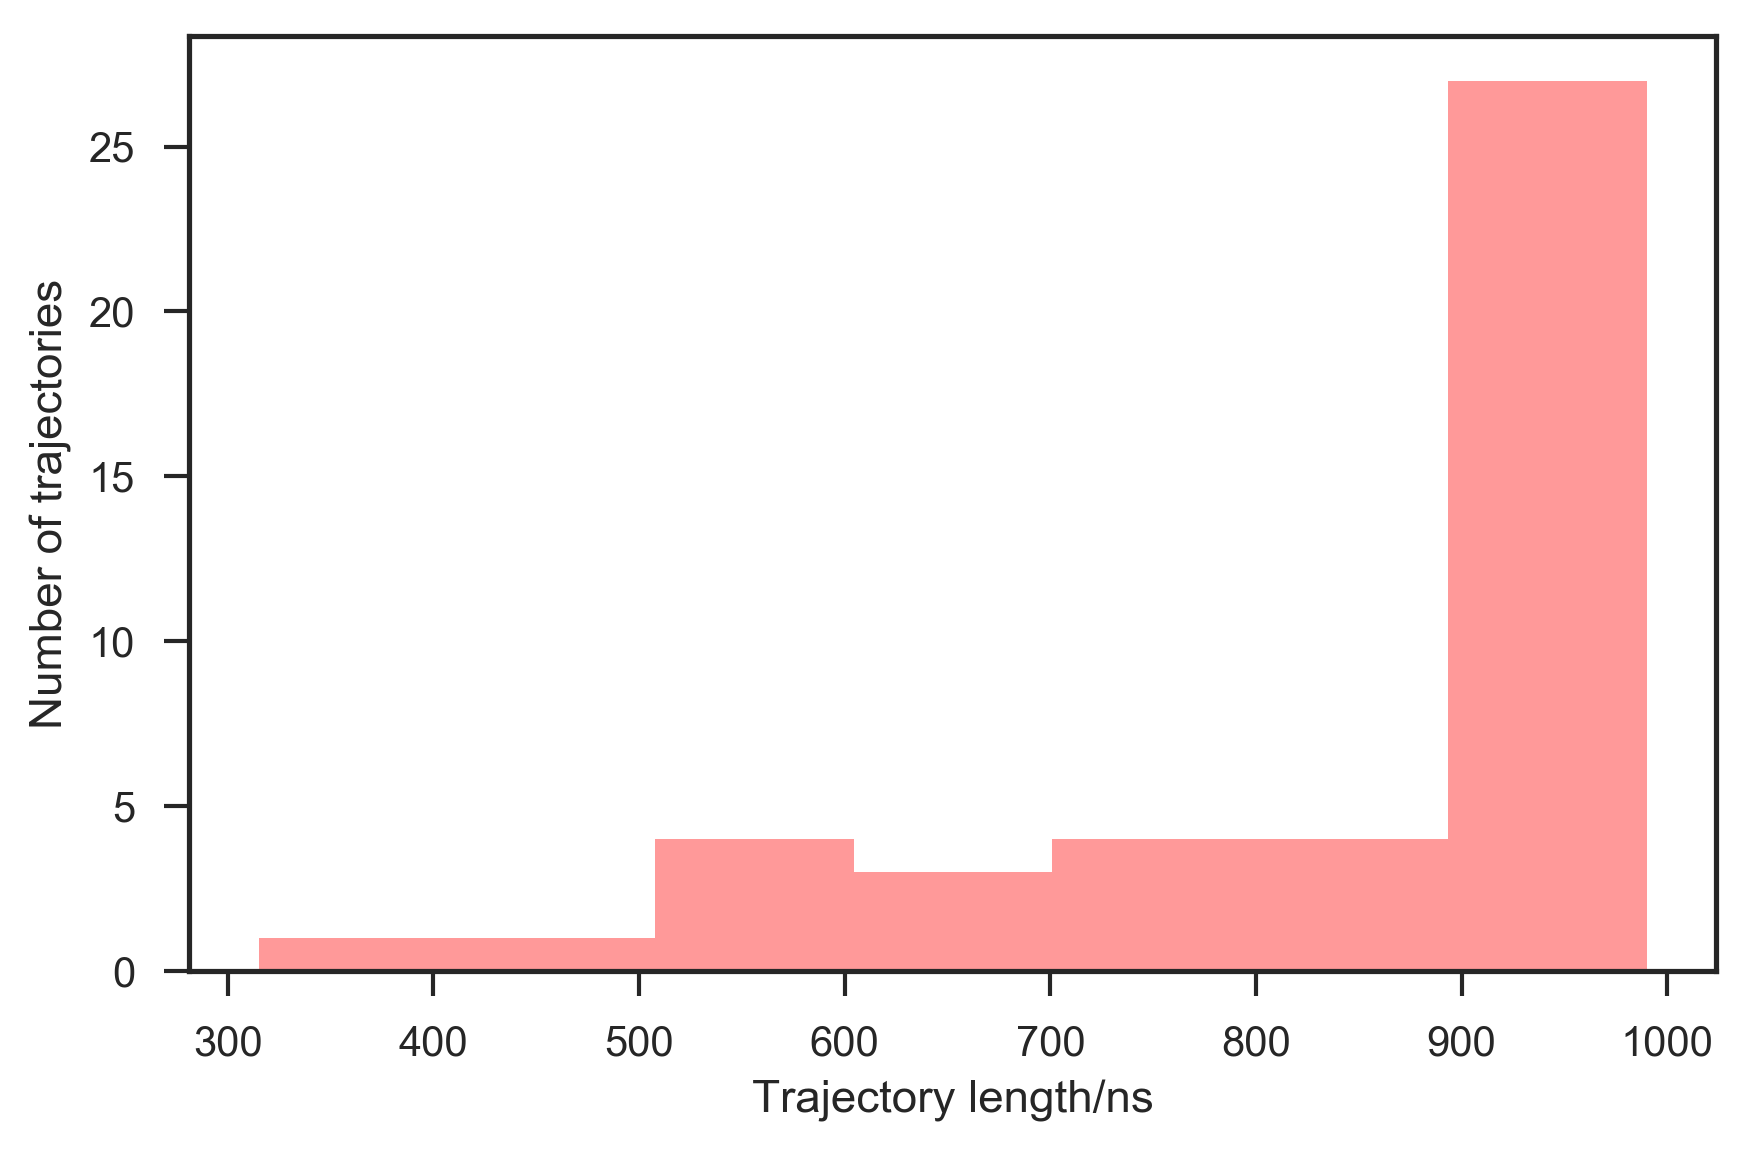

In [18]:
plt.figure(dpi=300)
sns.distplot(np.array(lengths1)/2, kde=False, color='red')
plt.ylabel('Number of trajectories')
plt.xlabel('Trajectory length/ns')
plt.tight_layout()
plt.savefig('traj_length_histograms/lengths_under_1us_red.pdf')
plt.show()

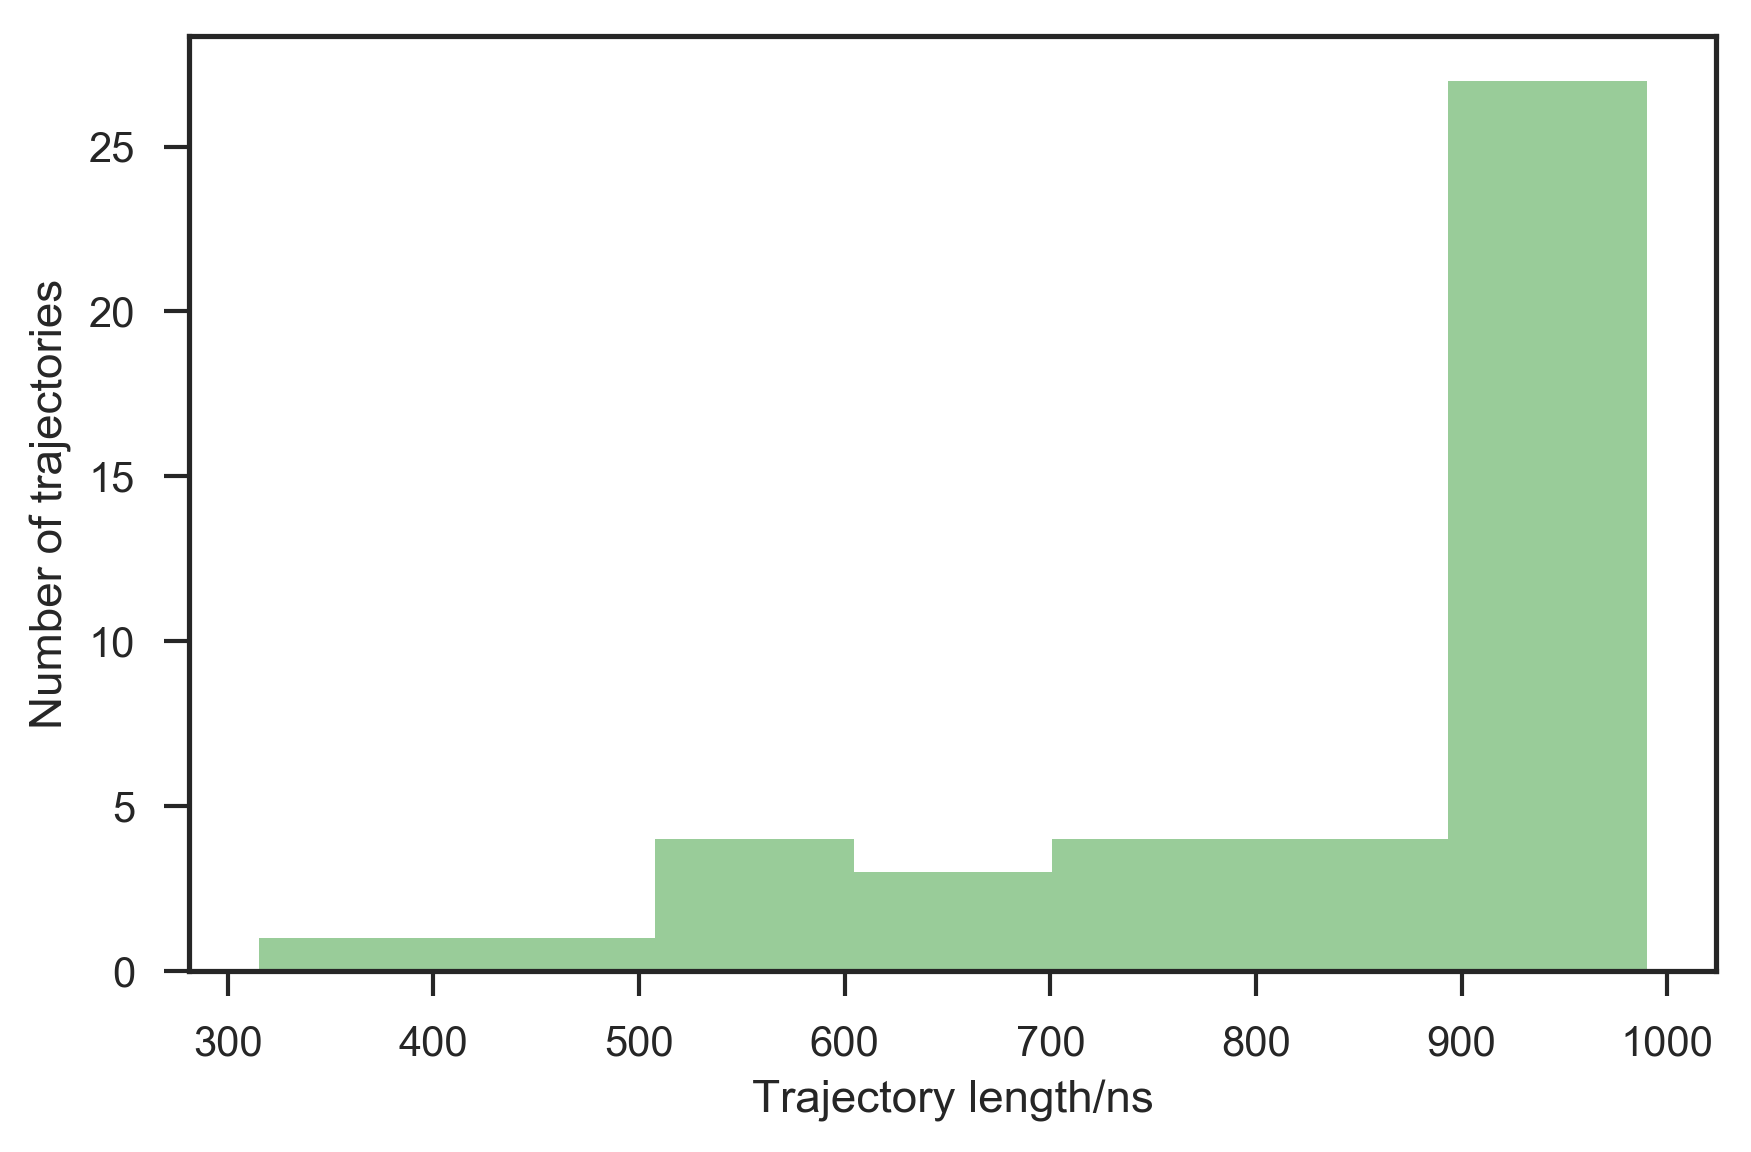

In [19]:
plt.figure(dpi=300)
sns.distplot(np.array(lengths1)/2, kde=False, color='green')
plt.ylabel('Number of trajectories')
plt.xlabel('Trajectory length/ns')
plt.tight_layout()
plt.savefig('traj_length_histograms/lengths_under_1us_green.pdf')
plt.show()

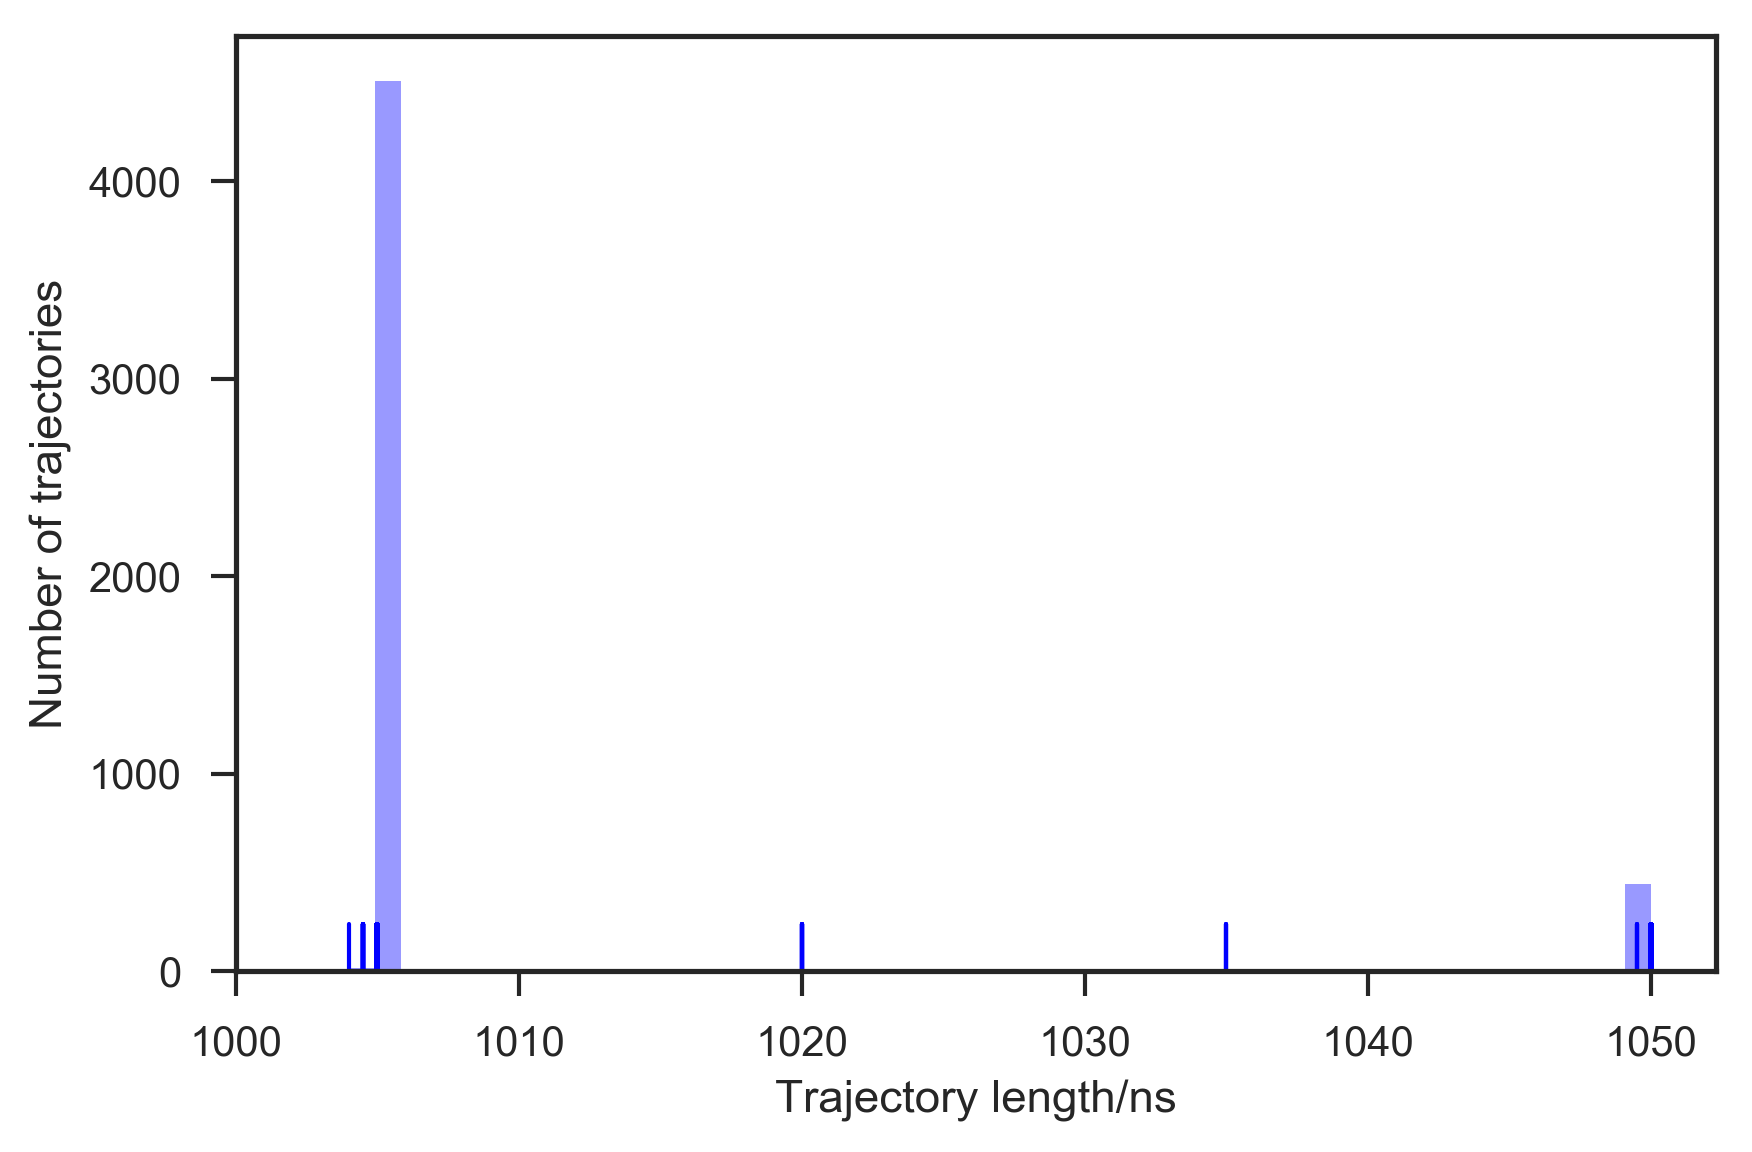

In [20]:
plt.figure(dpi=300)
sns.distplot(np.array(lengths2)/2, kde=False, rug=True, color='blue')
plt.ylabel('Number of trajectories')
plt.xlabel('Trajectory length/ns')
plt.xticks([1000,1010,1020,1030,1040,1050])
plt.tight_layout()
plt.savefig('traj_length_histograms/lengths_over_1us_blue.pdf')
plt.show()

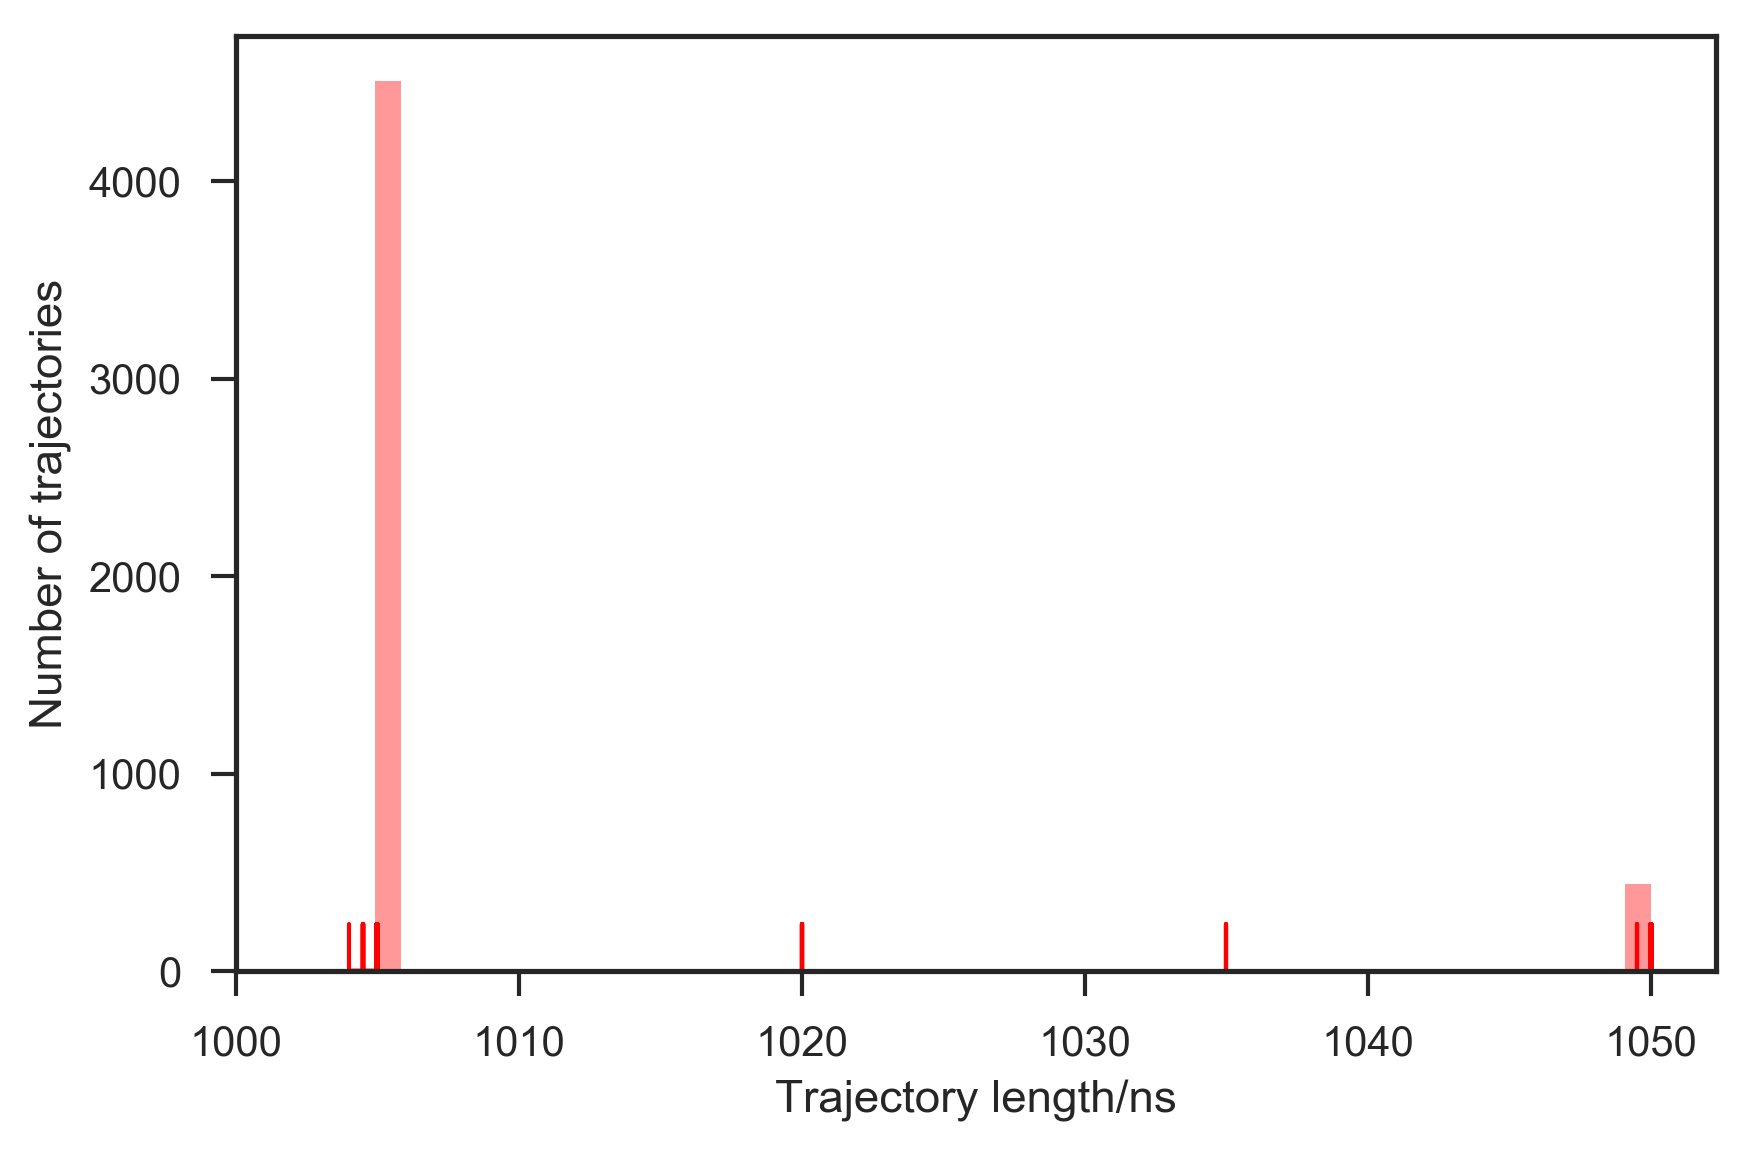

In [21]:
plt.figure(dpi=300)
sns.distplot(np.array(lengths2)/2, kde=False, rug=True, color='red')
plt.ylabel('Number of trajectories')
plt.xlabel('Trajectory length/ns')
plt.xticks([1000,1010,1020,1030,1040,1050])
plt.tight_layout()
plt.savefig('traj_length_histograms/lengths_over_1us_red.pdf')
plt.show()

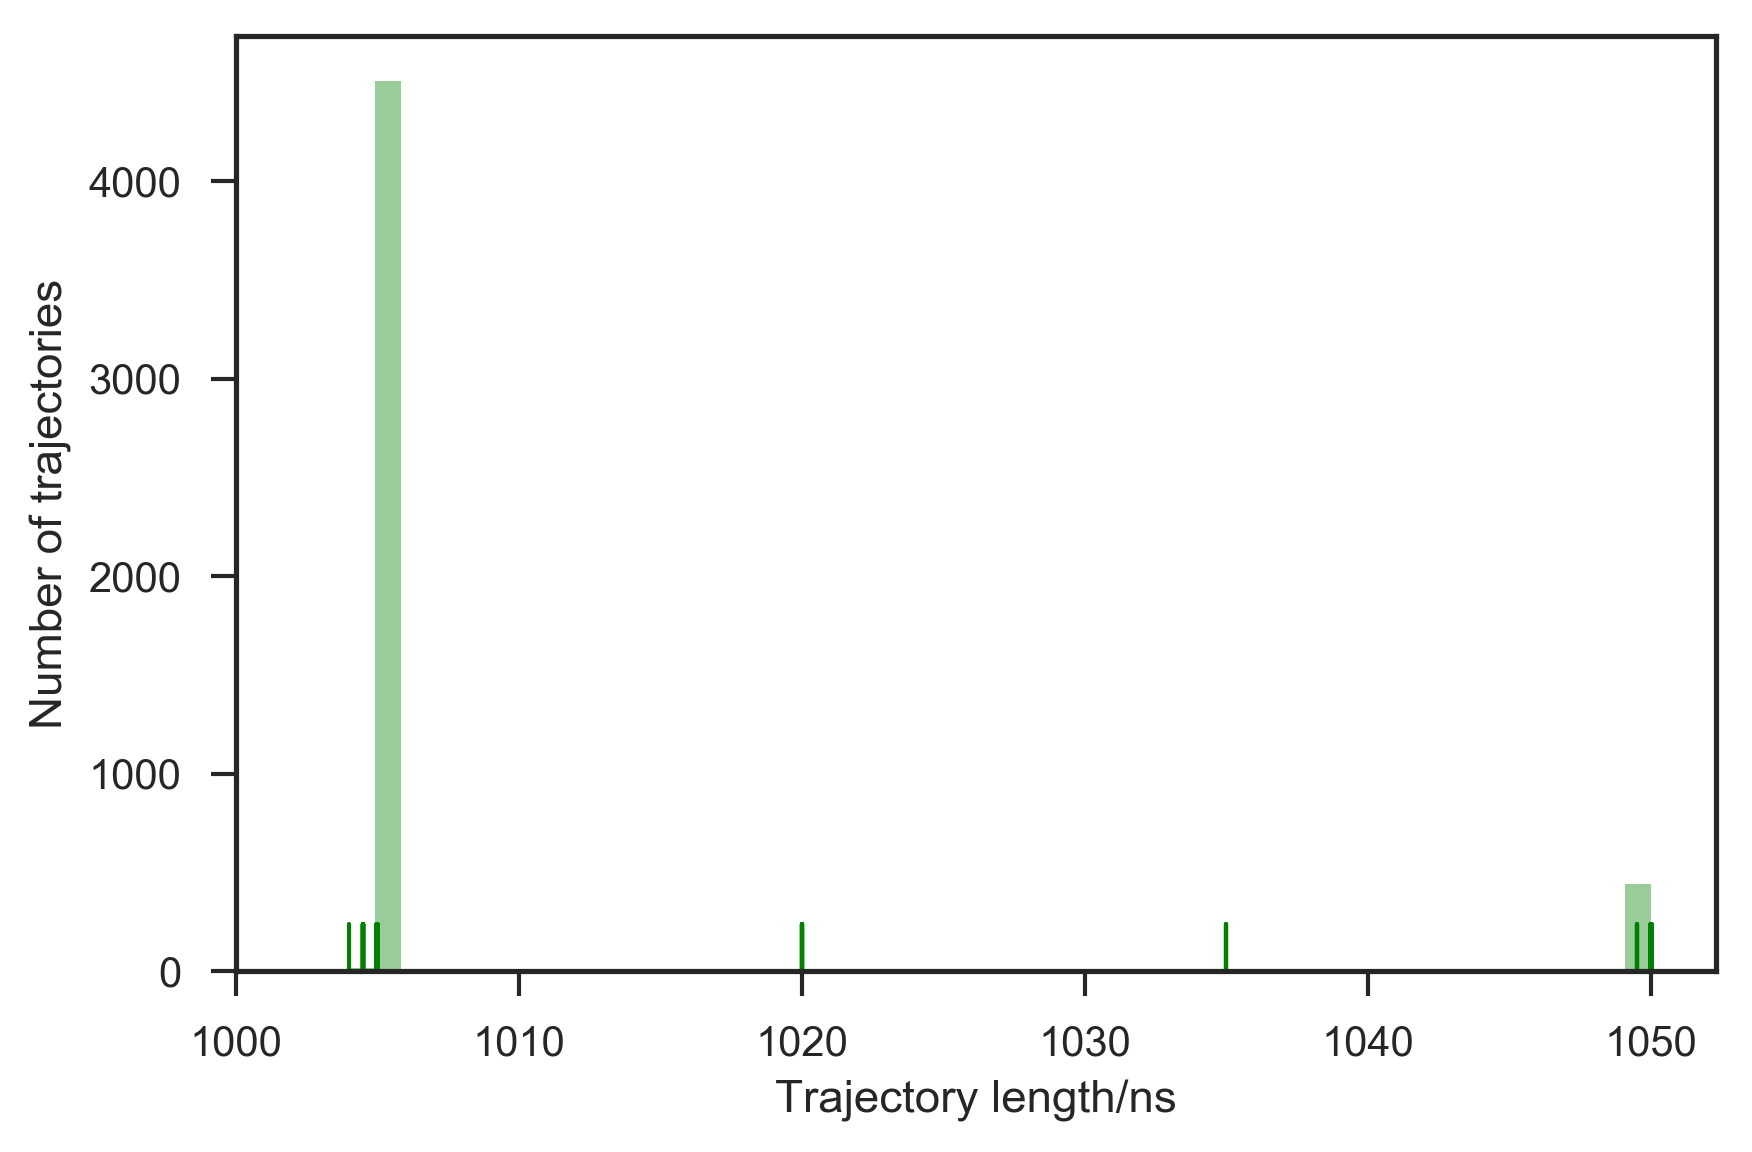

In [22]:
plt.figure(dpi=300)
sns.distplot(np.array(lengths2)/2, kde=False, rug=True, color='green')
plt.ylabel('Number of trajectories')
plt.xlabel('Trajectory length/ns')
plt.xticks([1000,1010,1020,1030,1040,1050])
plt.tight_layout()
plt.savefig('traj_length_histograms/lengths_over_1us_green.pdf')
plt.show()

In [64]:
#mkdir traj_length_histograms

In [68]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/msm'

In [1]:
# combine both histograms into one

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


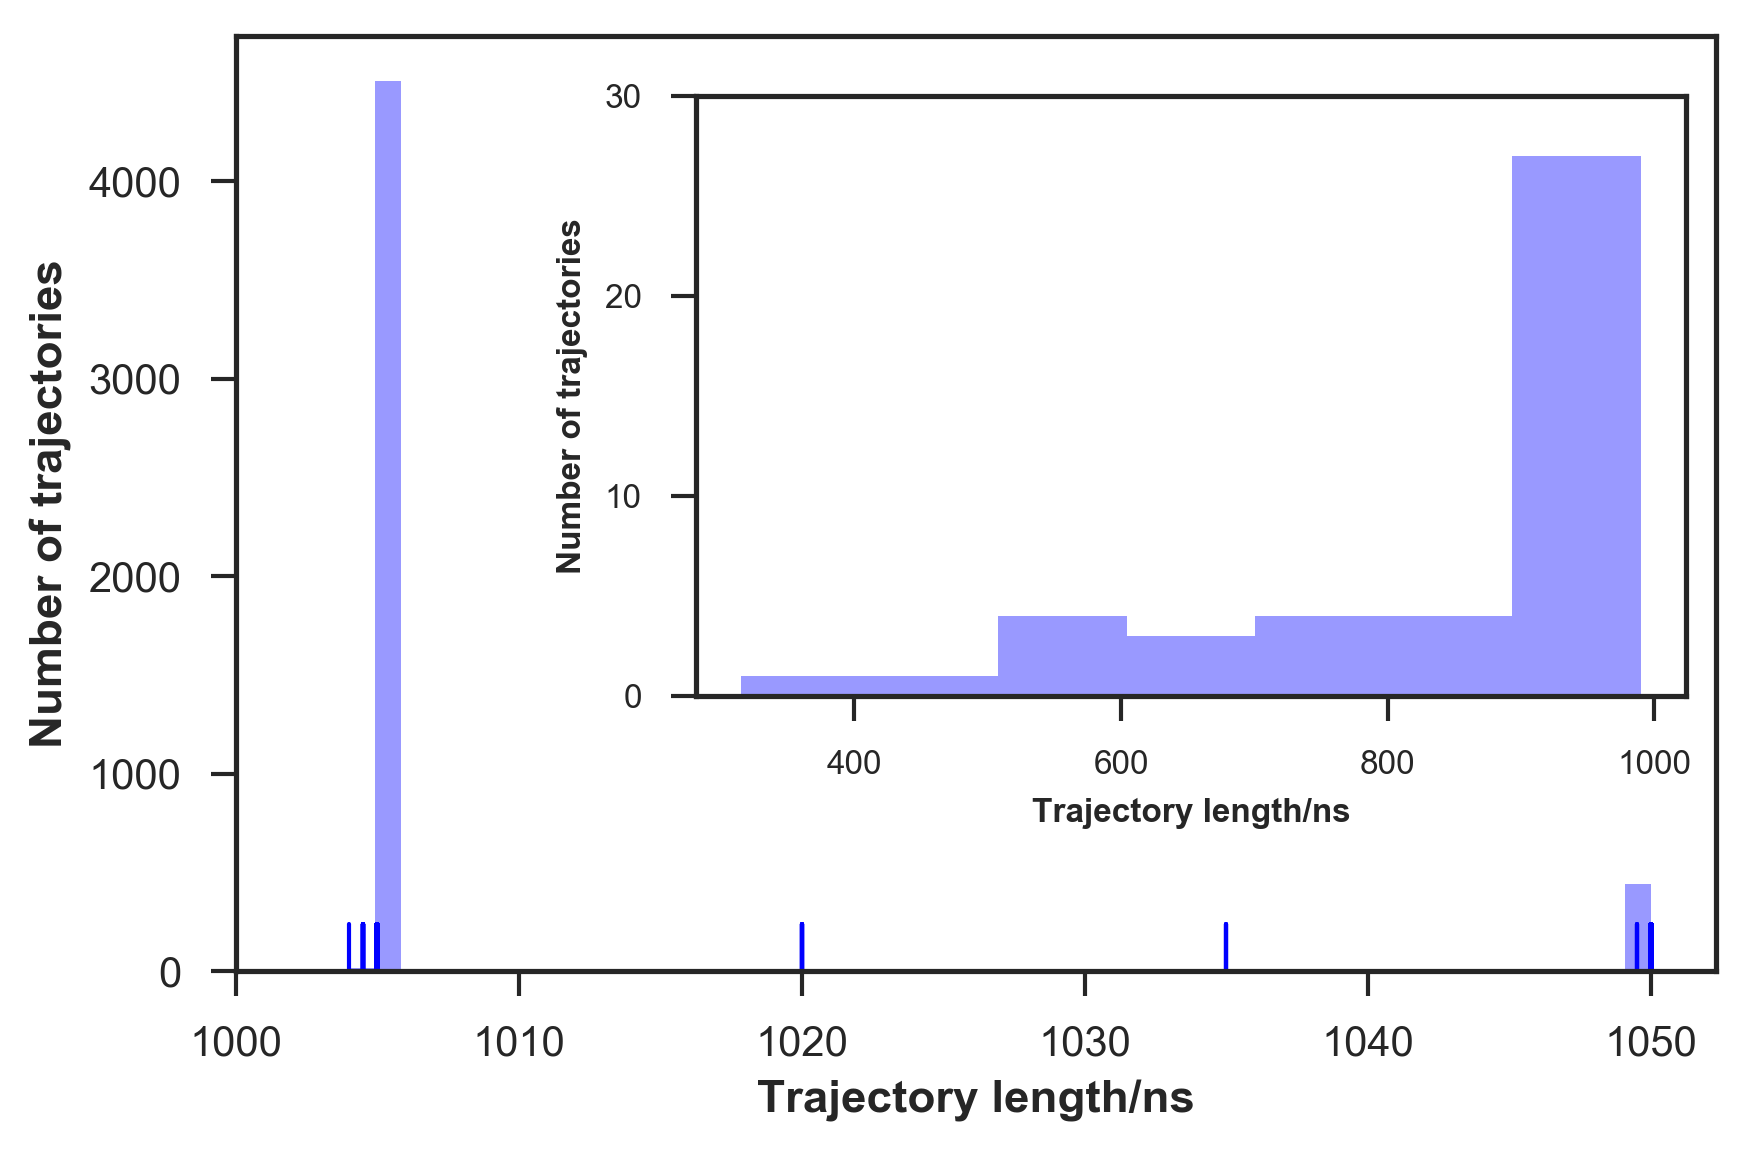

In [20]:
plt.rcParams['axes.labelweight'] = 'bold'
plt.figure(dpi=300)
sns.distplot(np.array(lengths2)/2, kde=False, rug=True, color='blue')
plt.ylabel('Number of trajectories')
plt.xlabel('Trajectory length/ns')
plt.xticks([1000,1010,1020,1030,1040,1050])

plt.axes([.4, .4, .55, .5])
sns.distplot(np.array(lengths1)/2, kde=False, color='blue')
plt.ylabel('Number of trajectories', fontsize=8)
plt.xlabel('Trajectory length/ns', fontsize=8)
plt.xticks([400,600,800,1000], fontsize=8)
plt.yticks([0,10,20,30], fontsize=8)

plt.tight_layout()
plt.savefig('traj_length_histograms/lengths_both_inset_blue.pdf')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


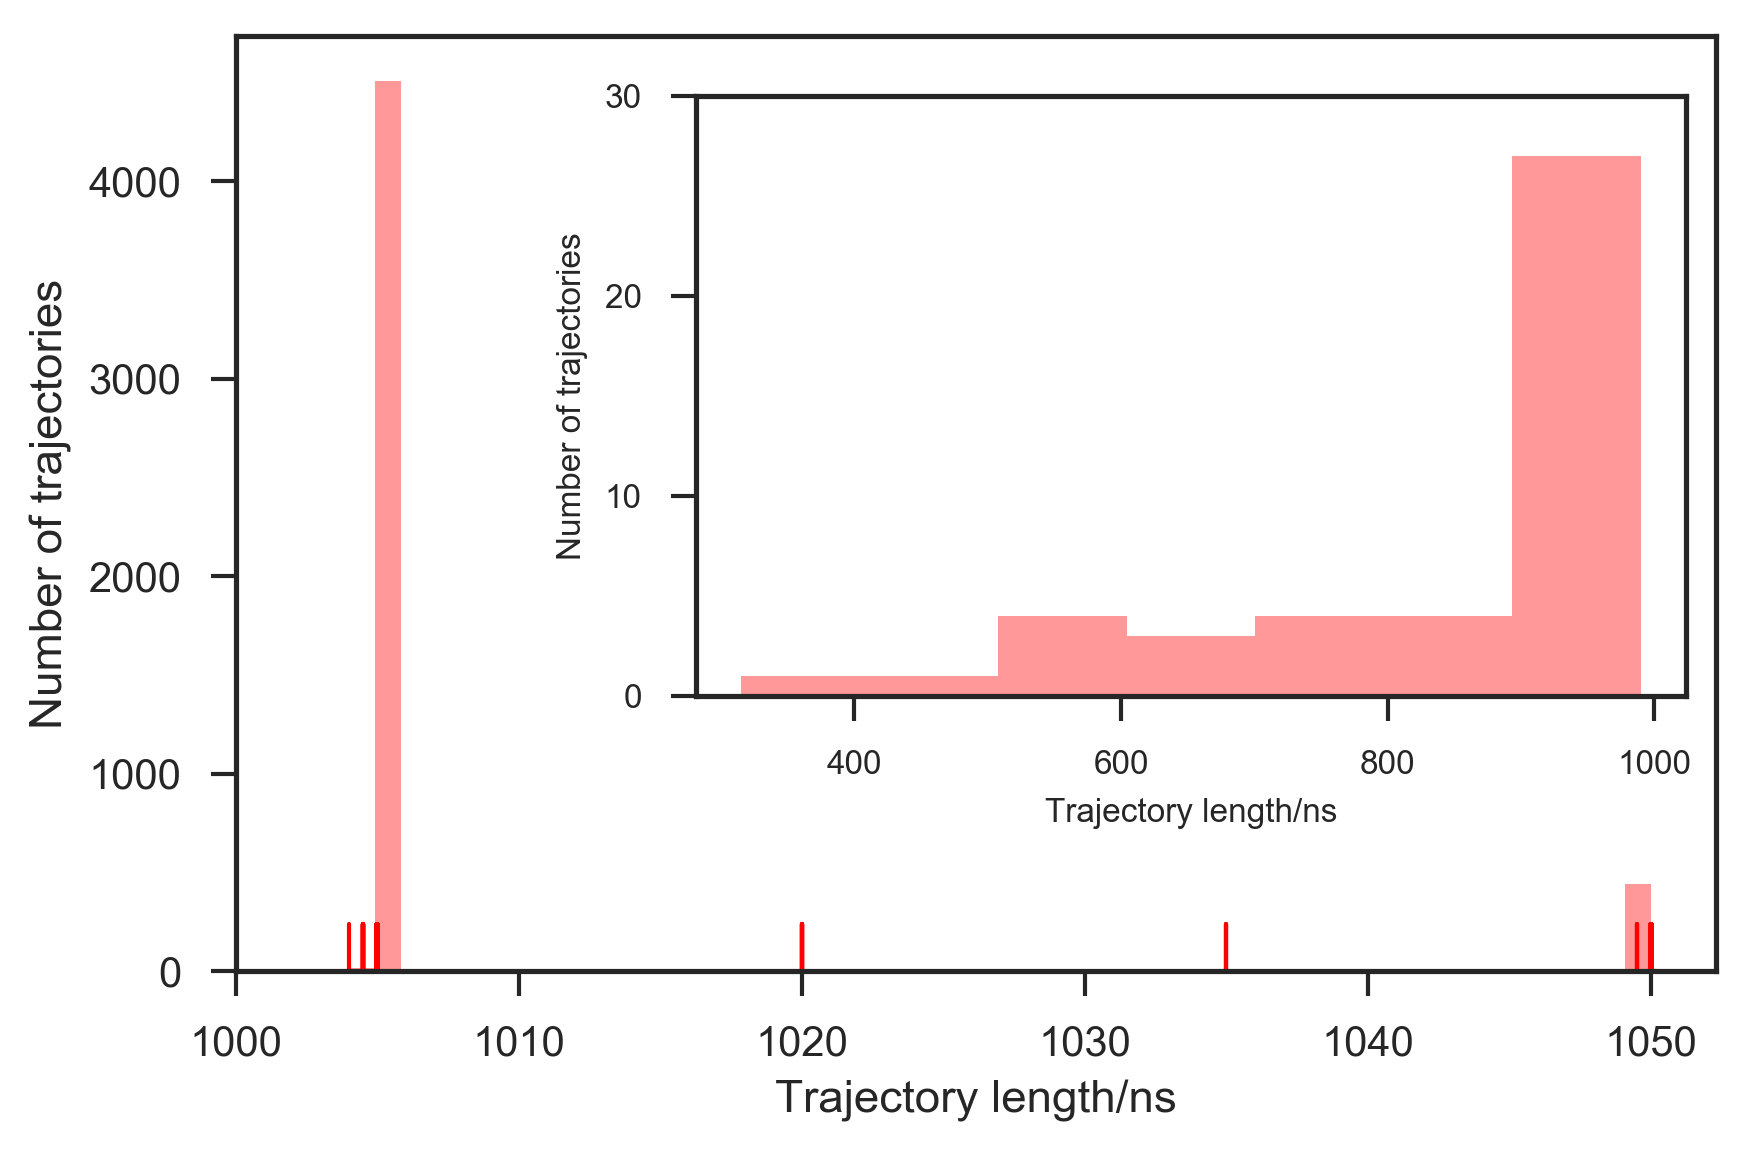

In [51]:
plt.figure(dpi=300)
sns.distplot(np.array(lengths2)/2, kde=False, rug=True, color='red')
plt.ylabel('Number of trajectories')
plt.xlabel('Trajectory length/ns')
plt.xticks([1000,1010,1020,1030,1040,1050])

plt.axes([.4, .4, .55, .5])
sns.distplot(np.array(lengths1)/2, kde=False, color='red')
plt.ylabel('Number of trajectories', fontsize=8)
plt.xlabel('Trajectory length/ns', fontsize=8)
plt.xticks([400,600,800,1000], fontsize=8)
plt.yticks([0,10,20,30], fontsize=8)

plt.tight_layout()
plt.savefig('traj_length_histograms/lengths_both_inset_red.pdf')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


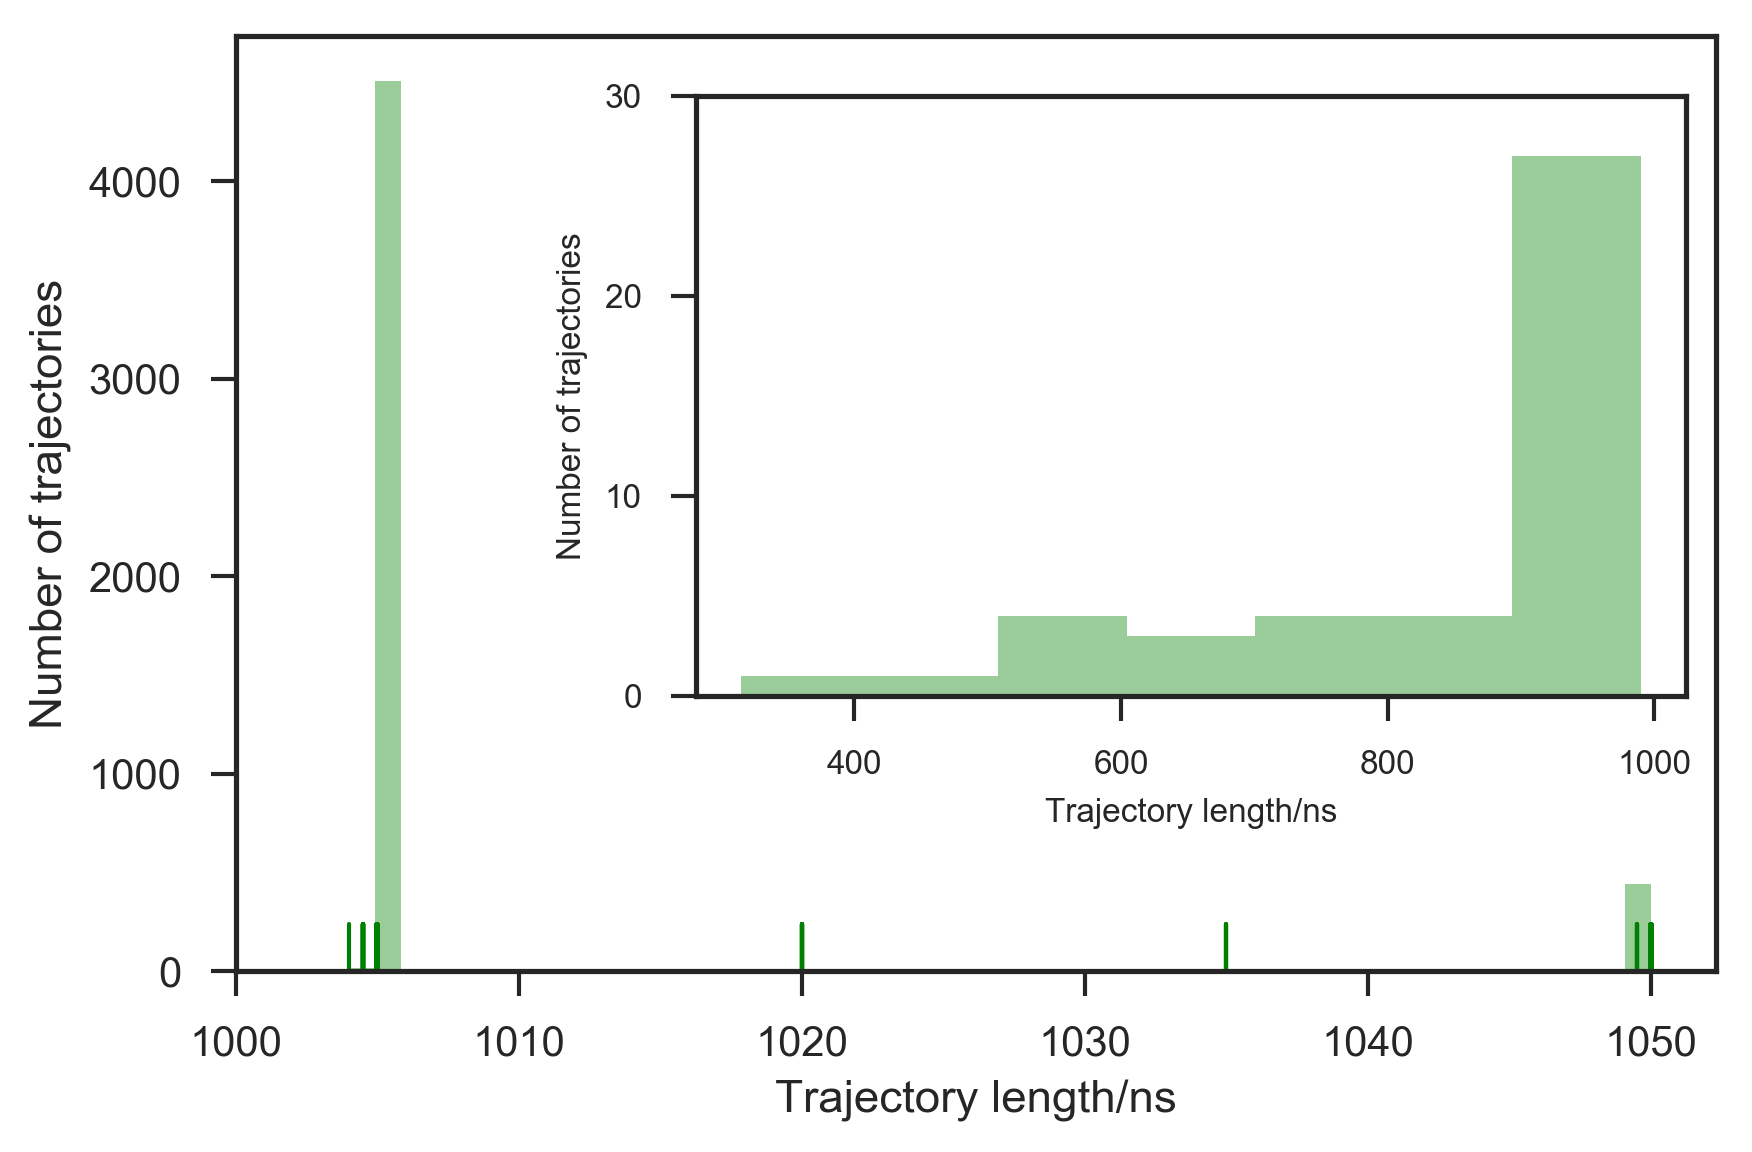

In [52]:
plt.figure(dpi=300)
sns.distplot(np.array(lengths2)/2, kde=False, rug=True, color='green')
plt.ylabel('Number of trajectories')
plt.xlabel('Trajectory length/ns')
plt.xticks([1000,1010,1020,1030,1040,1050])

plt.axes([.4, .4, .55, .5])
sns.distplot(np.array(lengths1)/2, kde=False, color='green')
plt.ylabel('Number of trajectories', fontsize=8)
plt.xlabel('Trajectory length/ns', fontsize=8)
plt.xticks([400,600,800,1000], fontsize=8)
plt.yticks([0,10,20,30], fontsize=8)

plt.tight_layout()
plt.savefig('traj_length_histograms/lengths_both_inset_green.pdf')
plt.show()